# **Desafio Cientista de Dados**
## João Pedro Ferreira Lobo, aluno de Sistemas de Informação da UFOP
### Linkedin: https://www.linkedin.com/in/joaoplobo/
### GitHub: https://github.com/JoaoLoboIT

# Introdução:
## Gostaria de agradecer a Indicium por esse excelente desafio. Independente do resultado, foi uma ótima experiência de aprendizado e prática. Já tinha contanto com Python por trabalhos fullstacks que fiz, e o Backend do projeto de extensão da UFOP que ajudo a desenvolver, além da minha Iniciação Científica onde usei Pandas, NumPy e Seaborn. Porém aplicar modelos de estatística, matéria que gosto muito e fui monitor, e principalmente Machine learning foi um aprendizado e tanto. Um amigo que trabalha na Indicium me indicou os cursos de preparação para o LightHouse. Fiz o material para Data Science, lendo o livro e fazendo o curso da Google. Muito do que foi aplicado nesse desafio tive como base esse curso, além de videos e pesquisas no google, youtube e stack overflow.

# 1 - Análise Exploratória dos Dados (EDA):
## 1.1 - Informações do conjunto de dados


1.   Series_Title: Título do filme [object]
2.   Released_Year: Ano em que o filme foi lançado[object]
3.   Certificate: Classifição do filme, sugerindo uma idade indicada. Variável catgórica [object]
4.   Runtime: Duração do filme [object]
5.   Genre: Gênero do filme [object]
6.   IMDB_Rating: Nota média do filma, avaliada pelos usuários do site IMDb [float64]
7.   Overview: Resumo rápido do filme [object]
8.   Meta_score: Pontuação calculada pelo site Metacritic  [float64]
9.   Director: Diretor do filme [object]
10.   Star1: Ator Principal 1 [object]
11.   Star2: Ator Principal 2 [object]
12.   Star3: Ator Principal 3 [object]
13.   Star4: Ator Principal 4 [object]
13.   No_of_Votes: Número total de votos da avaliação [int64]
14.   Gross: Receita bruta da bilheteria do filme [object]



In [156]:
# Instalar dependências

!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

In [158]:
# Importando os pacotes que serão utilizados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
import ml_edu.experiment
import ml_edu.results
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [159]:
# Carregando arquivo csv
df_original = pd.read_csv('desafio_indicium_imdb.csv')

## 1.2 - Avaliar o conjunto de dados de forma macro para compreender os dados

In [160]:
# Verificando as primeiras linhas do DataFrame
df_original.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [161]:
# Verificando o shape do arquivo
df_original.shape

(999, 16)

In [162]:
# Verificando as informações do arquivo
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


## 1.3 - Verificar se existe valores nulos

In [163]:
df_original.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


### 1.3.1 - Após uma visão geral das variáveis e os tipos de cada uma, se faz necessário o tratamento de alguns dados

In [164]:
# Criar novo df para tratamento
df_tratado = df_original.copy()

# Mudando Released_Year para Datetime
df_tratado['Released_Year'] = pd.to_datetime(df_tratado['Released_Year'], errors='coerce') # Passando errors pois tinha um valor problemático "PG"


# Mudando Runtime para TimeDelta
df_tratado['Runtime'] = pd.to_timedelta(df_tratado['Runtime'])

# Mudando Gross para Float
df_tratado['Gross'] = df_tratado['Gross'].str.replace(',', '').astype(float)

# Tratando valores nulos para colunas numéricas
# Seguindo uma boa prática, calcula-se a mediana da coluna e troca o valor nulo pela mesma, evitando outliers

# Meta Score
mediana_meta_score = df_tratado['Meta_score'].median()
df_tratado['Meta_score'] = df_tratado['Meta_score'].fillna(mediana_meta_score)
# Gross
mediana_gross = df_tratado['Gross'].median()
df_tratado['Gross'] = df_tratado['Gross'].fillna(mediana_gross)

# Tratando valores nulos para colunas categóricas
moda_certificate = df_original['Certificate'].mode()[0] # Usando 0 para retornar apenas um número caso tenha empate
df_tratado['Certificate'] = df_tratado['Certificate'].fillna(moda_certificate)


## 1.4 - Verificar os valores únicos em cada variável

In [165]:
# Total de valores únicos de cada variável

valores_unicos = []
for i in df_tratado.columns[0:16].to_list():
  print(i, ':', len(df_tratado[i].astype(str).value_counts()))
  valores_unicos.append(len(df_tratado[i].astype(str).value_counts()))

Unnamed: 0 : 999
Series_Title : 998
Released_Year : 100
Certificate : 16
Runtime : 140
Genre : 202
IMDB_Rating : 16
Overview : 999
Meta_score : 63
Director : 548
Star1 : 659
Star2 : 840
Star3 : 890
Star4 : 938
No_of_Votes : 998
Gross : 823


## 1.5 - Visualizar as medidas estatísticas principais do conjunto de dados
### Média | Mediana | Desvio Padrão | Quartis | Valores mínimos e máximos

In [166]:
df_tratado.describe(include='all')

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,999.00,999,998,999,999,999,999.00,999,999.00,999,999,999,999,999,999.00,999.00
unique,NaN,998,NaN,16,NaN,202,NaN,999,NaN,548,659,840,890,938,NaN,NaN
top,NaN,Drishyam,NaN,U,NaN,Drama,NaN,A man in London tries to help a counter-espion...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN
freq,NaN,2,NaN,335,NaN,84,NaN,1,NaN,14,12,7,5,4,NaN,NaN
mean,500.00,NaN,1991-03-20 10:33:25.611222400,NaN,0 days 02:02:52.312312312,NaN,7.95,NaN,78.13,NaN,NaN,NaN,NaN,NaN,271621.42,60533377.16
min,1.00,NaN,1920-01-01 00:00:00,NaN,0 days 00:45:00,NaN,7.60,NaN,28.00,NaN,NaN,NaN,NaN,NaN,25088.00,1305.00
25%,250.50,NaN,1976-01-01 00:00:00,NaN,0 days 01:43:00,NaN,7.70,NaN,72.00,NaN,NaN,NaN,NaN,NaN,55471.50,5011838.50
50%,500.00,NaN,1999-01-01 00:00:00,NaN,0 days 01:59:00,NaN,7.90,NaN,79.00,NaN,NaN,NaN,NaN,NaN,138356.00,23457439.50
75%,749.50,NaN,2009-01-01 00:00:00,NaN,0 days 02:17:00,NaN,8.10,NaN,85.50,NaN,NaN,NaN,NaN,NaN,373167.50,61576564.50
max,999.00,NaN,2020-01-01 00:00:00,NaN,0 days 05:21:00,NaN,9.20,NaN,100.00,NaN,NaN,NaN,NaN,NaN,2303232.00,936662225.00


## 1.5 - Avaliar as variáveis de forma individual através de gráficos
### Análise simples porém visual, para visualizarmos melhor os dados preparando as ideias para futuras análises e modelos.


#### 1.5.1 - Histograma da variavel alvo, IMDB. A visualização em histograma nos permite ver que a maioria das notas estão entre 7.5 e 8.5, ou seja, a grande parte dos filmes são bem avaliados.


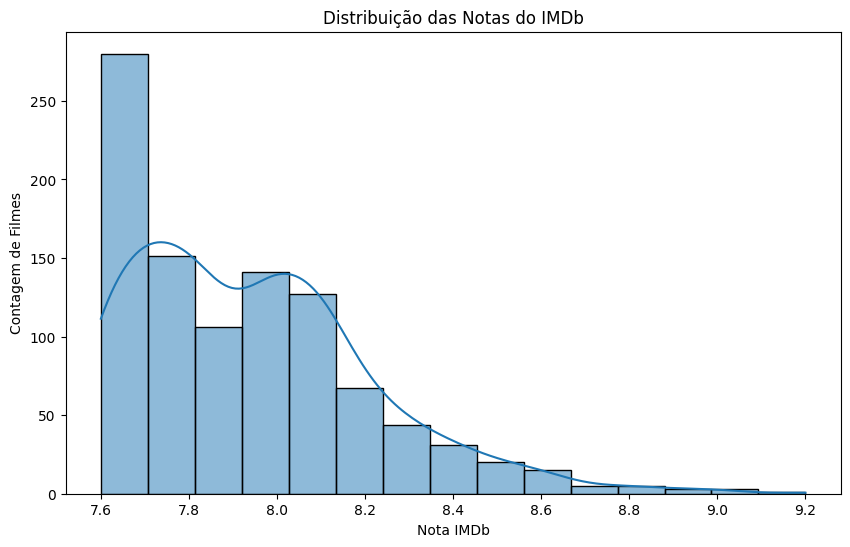

In [167]:
# Distribuição de notas do IMDb

plt.figure(figsize=(10, 6))
sns.histplot(data=df_tratado, x='IMDB_Rating', kde=True, bins=15)
plt.title('Distribuição das Notas do IMDb')
plt.xlabel('Nota IMDb')
plt.ylabel('Contagem de Filmes')
plt.show()

#### 1.5.2 - Através desse gráfico de barras vimos que no nosso DataFrame, a maioria dos filmes tem a classificação igual a U, além de que mais de 10 tipos de classificação aparecem muito pouco entre os filmes.


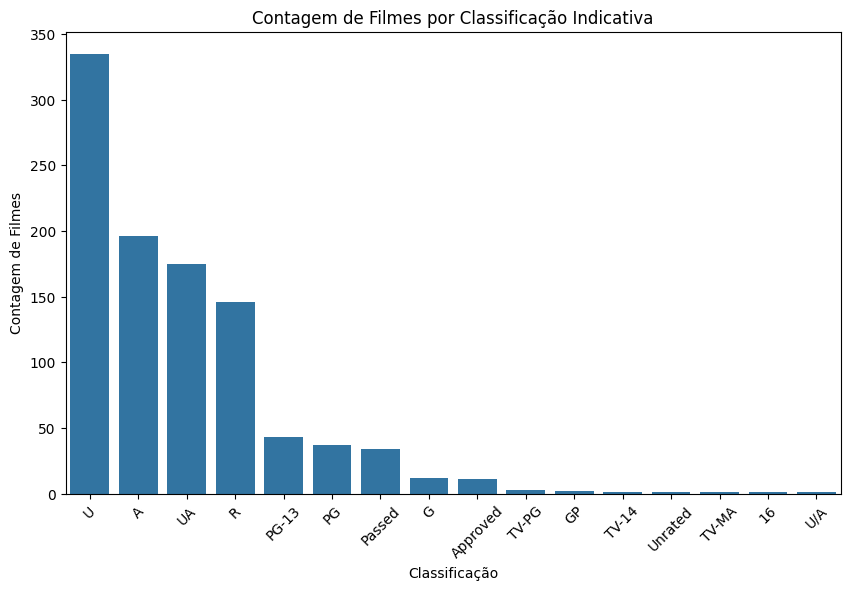

In [168]:
# Contagem de Filmes por Classificação (Certificate)

plt.figure(figsize=(10, 6))
sns.countplot(x='Certificate', data=df_tratado, order=df_tratado['Certificate'].value_counts().index)
plt.title('Contagem de Filmes por Classificação Indicativa')
plt.xlabel('Classificação')
plt.ylabel('Contagem de Filmes')

# Rotaciona os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=45)
plt.show()

#### 1.5.3 - Este histograma mostra que a grande maioria dos filmes possui um número relativamente baixo de votos, enquanto um grupo muito pequeno de filmes extremamente populares acumula milhões de votos. Vendo esse gráfico pode-se lembrar até de um problema discutido no meio do cinema nos últimos anos, em que a maioria dos filmes publicados tem um número muito baixo de bilheteria, enquanto uma parte muito pequena tem bilheterias.


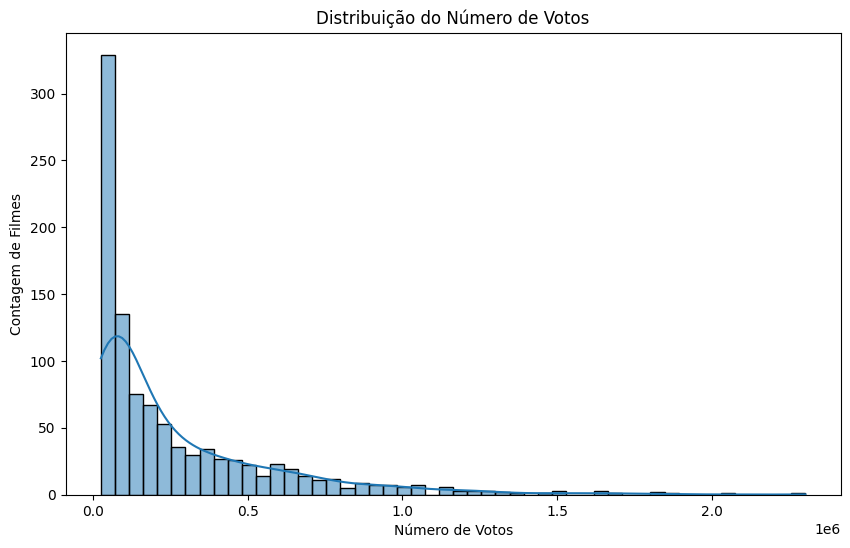

In [169]:
# Distribuição do Número de Votos
plt.figure(figsize=(10, 6))
sns.histplot(df_tratado['No_of_Votes'], bins=50, kde=True)
plt.title('Distribuição do Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('Contagem de Filmes')
plt.show()

#### 1.5.4 - Aqui podemos ver o padrão de duração dos filmes.

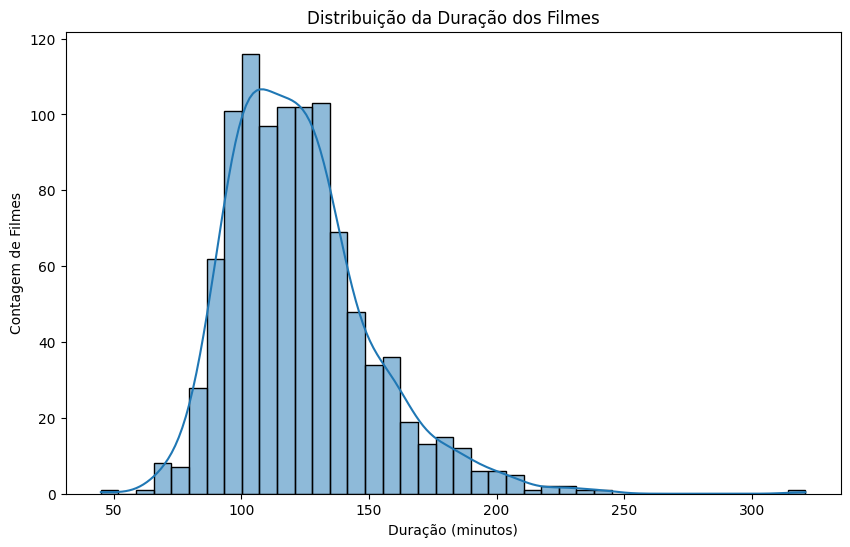

In [170]:
# Distribuição da Duração dos Filmes (Runtime)
# Convertendo timedelta para minutos totais para facilitar a plotagem
df_tratado['Runtime_minutos'] = df_tratado['Runtime'].dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.histplot(df_tratado['Runtime_minutos'], bins=40, kde=True)
plt.title('Distribuição da Duração dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Contagem de Filmes')
plt.show()

## 1.6 - Analisar possíveis Outliers


#### Primeiro, pegamos todas variáveis do tipo numérico.

In [171]:
variaveis_numericas = df_tratado.select_dtypes(include=np.number).columns.tolist()

# Removendo 'Unnamed: 0'
if 'Unnamed: 0' in variaveis_numericas:
    variaveis_numericas.remove('Unnamed: 0')

print("Variáveis numéricas que serão plotadas:")
print(variaveis_numericas)

Variáveis numéricas que serão plotadas:
['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime_minutos']


#### Depois, criamos os Subplots e plotamos cada Boxplot.

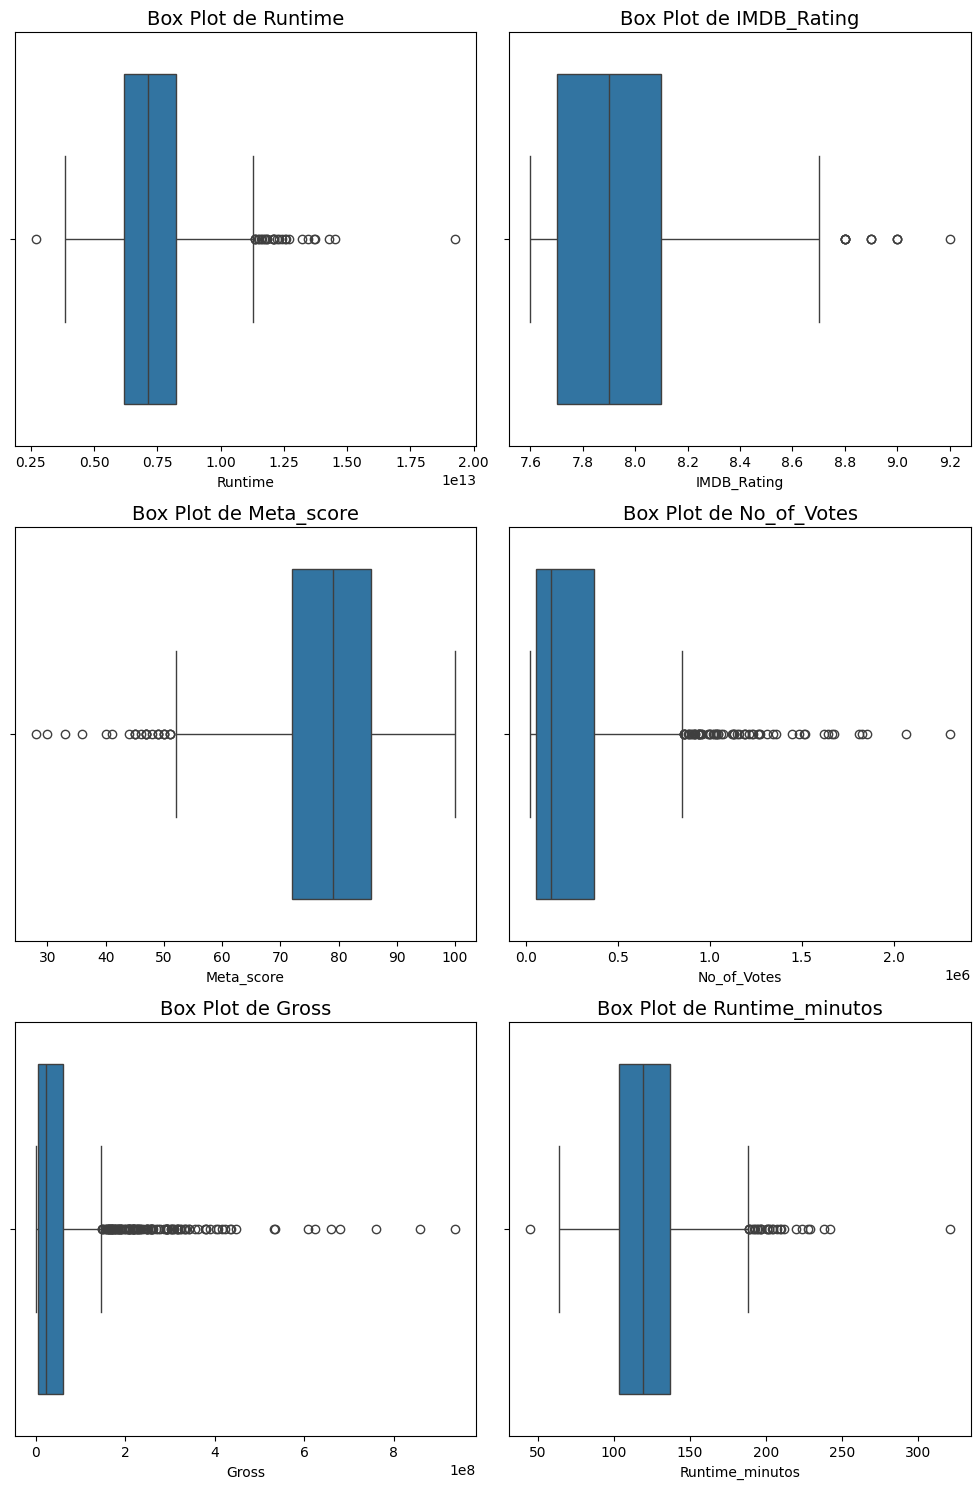

In [172]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

for ax, coluna in zip(axes.flatten(), variaveis_numericas):
    sns.boxplot(data=df_tratado, x=coluna, ax=ax)

    ax.set_title(f'Box Plot de {coluna}', fontsize=14)

plt.tight_layout()
plt.show()

### 1.6.1 - Tratar Outliers
#### Agora que já os vizualizamos, vamos excluí-los para esse valores extremos não atrapalharem o futuro modelo.




In [173]:
# df_tratado -> primeiro tratamento no df original: nulls, nan, nat
# df_tratadissimo -> df tratado sem outliers

df_tratadissimo = df_tratado.copy()

# Usando o Método Tukey
for coluna in variaveis_numericas:
    Q1 = df_tratadissimo[coluna].quantile(0.25)
    Q3 = df_tratadissimo[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_tratadissimo = df_tratadissimo[
        (df_tratadissimo[coluna] >= limite_inferior) &
        (df_tratadissimo[coluna] <= limite_superior)
    ]

print(f"Número de linhas ANTES de remover outliers: {len(df_tratado)}")
print(f"Número de linhas DEPOIS de remover outliers: {len(df_tratadissimo)}")

Número de linhas ANTES de remover outliers: 999
Número de linhas DEPOIS de remover outliers: 763


## 1.7 - Perguntas
### Depois de analisar os dados e fazer algumas trataçoes, é interassante que algumas perguntas sejam feitas e respondidas para já darmos início no processo do nosso modelo de aprendizado.


#### Qual a nota média do IMDb para cada gênero?

/tmp/ipython-input-835197593.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




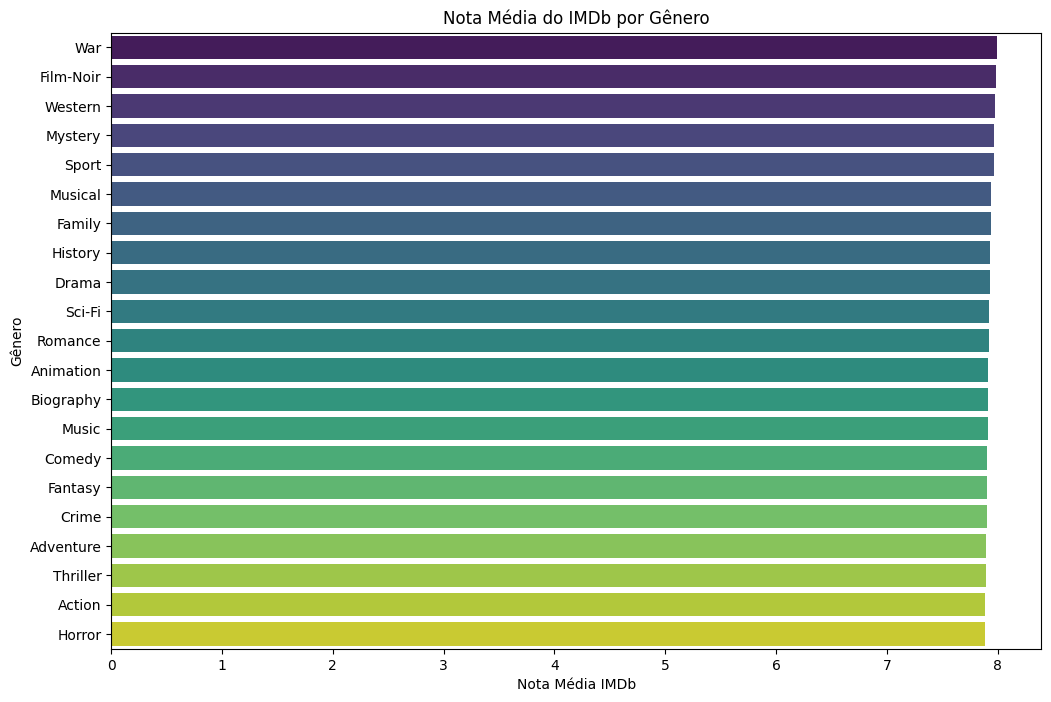

In [174]:
generos_explodidos = df_tratadissimo.assign(Genre=df_tratadissimo['Genre'].str.split(', ')).explode('Genre')
media_por_genero = generos_explodidos.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=media_por_genero.values, y=media_por_genero.index, palette='viridis')
plt.title('Nota Média do IMDb por Gênero')
plt.xlabel('Nota Média IMDb')
plt.ylabel('Gênero')
plt.show()

#### Através desse gráfico conseguimos tirar informações importantes. Como já havia visto antes, grande parte dos filmes na base de dados tem nota acima de 7,5. Esse gráfico confirma isso, podemos ver a média por gênero, que é muito boa. Além disso, percebe-se que a variação da nota média do IMDb por gênero é muito baixa, ou seja, o gênero do filme não influencia na nota dele.

#### Qual a correlação entre Runtime e IMDB_Rating? A relação é linear?


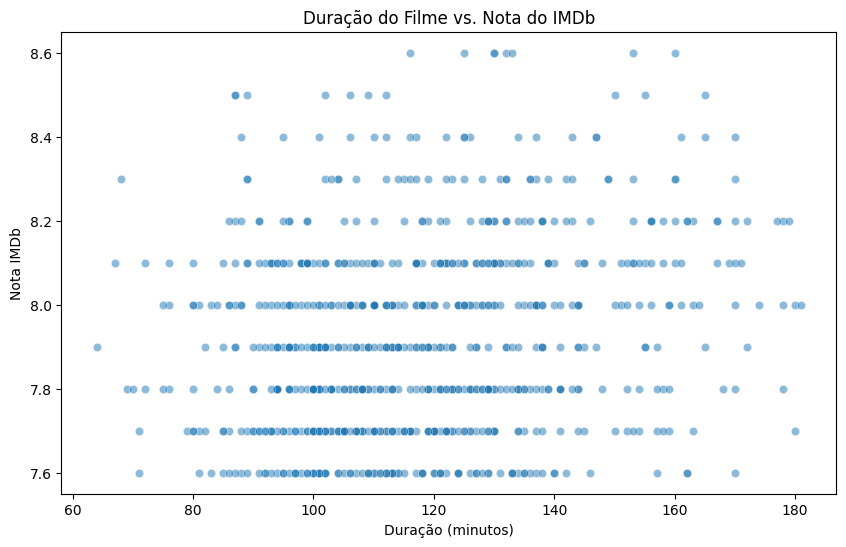

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tratadissimo, x='Runtime_minutos', y='IMDB_Rating', alpha=0.5)
plt.title('Duração do Filme vs. Nota do IMDb')
plt.xlabel('Duração (minutos)')
plt.ylabel('Nota IMDb')
plt.show()

#### A relação não é linear. Fiz essa pergunta pois particularmente, não gosto de filmes muito longos, e achei que poderia ter uma relação com a nota IMDb. Mas o gráfico nega isso. Um filme longo pode ter variações entre notas menores e maiores. O mesma acontece com filmes mais curtos.

#### Quais atores possuem a maior média de IMDB_Rating em seus filmes?
##### Para responder essa pergunta decidi criar uma coluna nova, pois um ator x poderia ser Star 1 de um filme mas Star 2 de outro.


/tmp/ipython-input-2997442057.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




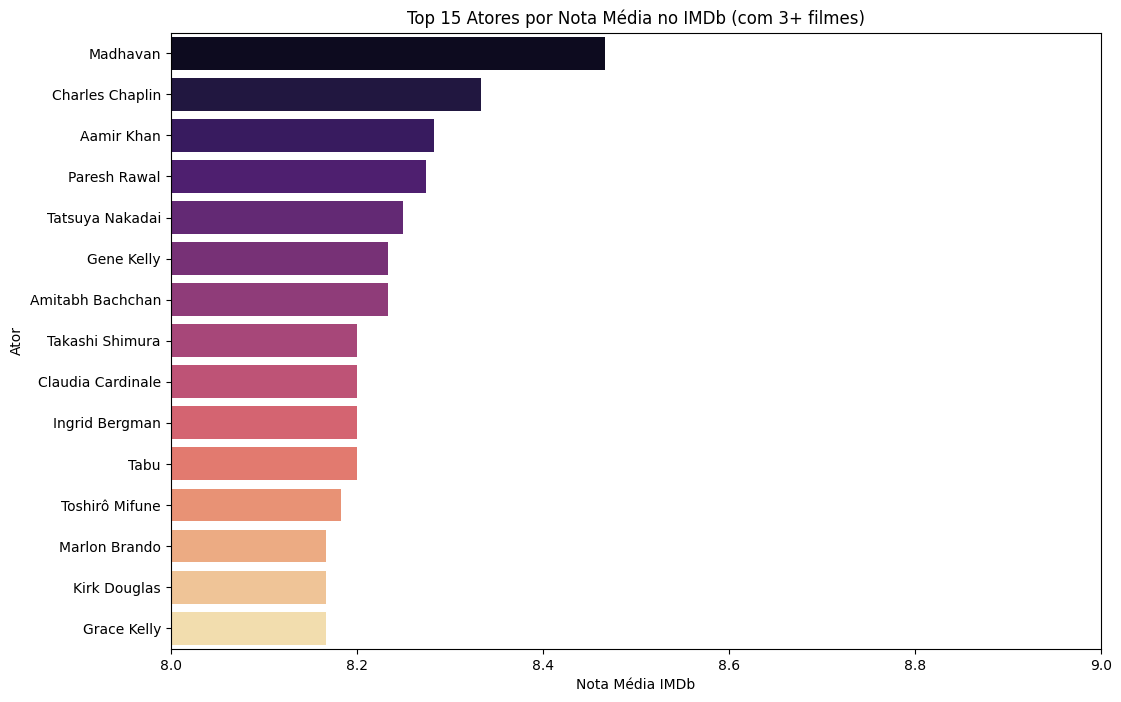

In [176]:
# Juntando todos os atores em nova coluna
atores = pd.melt(df_tratadissimo,
                 id_vars=['IMDB_Rating'],
                 value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
                 value_name='Ator')

media_por_ator = atores.groupby('Ator')['IMDB_Rating'].agg(['mean', 'count']).reset_index()

# Considero apenas atores que ja fizeram 3 ou mais filmes
atores_filtrados = media_por_ator[media_por_ator['count'] >= 3]

top_15_atores = atores_filtrados.sort_values(by='mean', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_atores, x='mean', y='Ator', palette='magma')
plt.title('Top 15 Atores por Nota Média no IMDb (com 3+ filmes)')
plt.xlabel('Nota Média IMDb')
plt.ylabel('Ator')
plt.xlim(8, 9)
plt.show()

#### Nesse gráfico é possível ver que existem atores com médias consideravelmente maiores que outros.

#### Quais atores aparecem com mais frequência no top 10% dos filmes com maior nota?
##### Após o resultado do último gráfico, decidi explorar um pouco mais os atores.


A nota mínima para um filme estar no top 10% é: 8.20



/tmp/ipython-input-3214365964.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




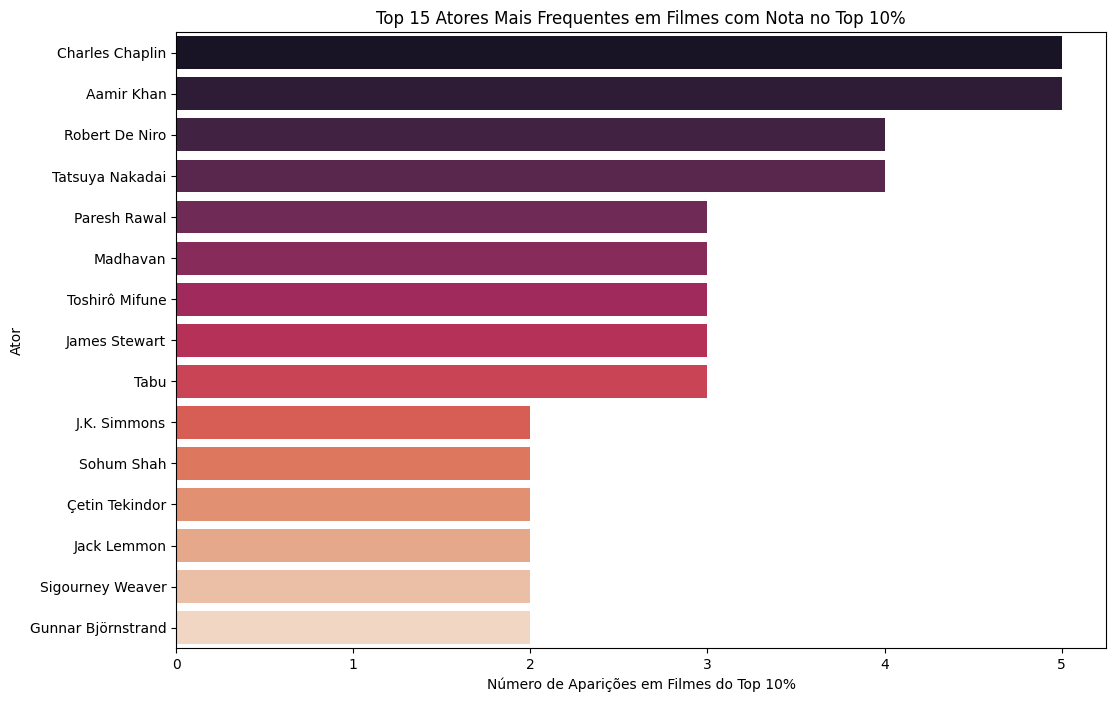

In [177]:
# Calculando nota mínima
nota_de_corte_top10 = df_tratadissimo['IMDB_Rating'].quantile(0.90)
print(f"A nota mínima para um filme estar no top 10% é: {nota_de_corte_top10:.2f}\n")

top_10_filmes = df_tratadissimo[df_tratadissimo['IMDB_Rating'] >= nota_de_corte_top10]

# Juntando os atores novamente, só que só dos top filmes
atores_top_filmes = pd.melt(top_10_filmes,
                              value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
                              value_name='Ator')['Ator']

contagem_atores = atores_top_filmes.value_counts()
top_15_atores_frequentes = contagem_atores.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_atores_frequentes.values, y=top_15_atores_frequentes.index, palette='rocket')
plt.title('Top 15 Atores Mais Frequentes em Filmes com Nota no Top 10%')
plt.xlabel('Número de Aparições em Filmes do Top 10%')
plt.ylabel('Ator')
plt.show()

#### Aqui talvez seja um gráfico mais interessante. Dos melhores filmes do df, conseguimos ver quais atores estão mais presentes.

#### Qual a nota média dos melhores diretores?




/tmp/ipython-input-2467525857.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




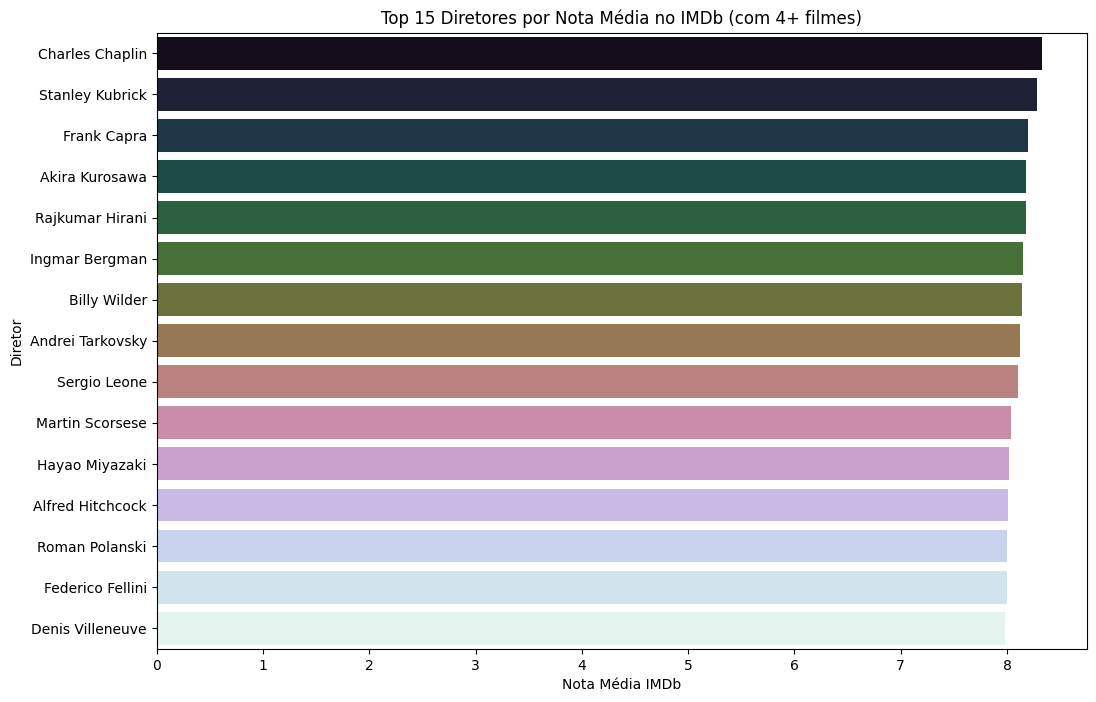

In [178]:
media_por_diretor = df_tratadissimo.groupby('Director')['IMDB_Rating'].agg(['mean', 'count']).reset_index()

# Considerei apenas diretotres com 4 ou mais filmes
diretores_filtrados = media_por_diretor[media_por_diretor['count'] >= 4]

top_15_diretores = diretores_filtrados.sort_values(by='mean', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_diretores, x='mean', y='Director', palette='cubehelix')
plt.title('Top 15 Diretores por Nota Média no IMDb (com 4+ filmes)')
plt.xlabel('Nota Média IMDb')
plt.ylabel('Diretor')
plt.show()

#### Este gráfico reforça que os melhores diretores também tem uma média muito balançeada, com notas muito boas.

#### Qual a correlação entre Gross e IMDB_Rating?


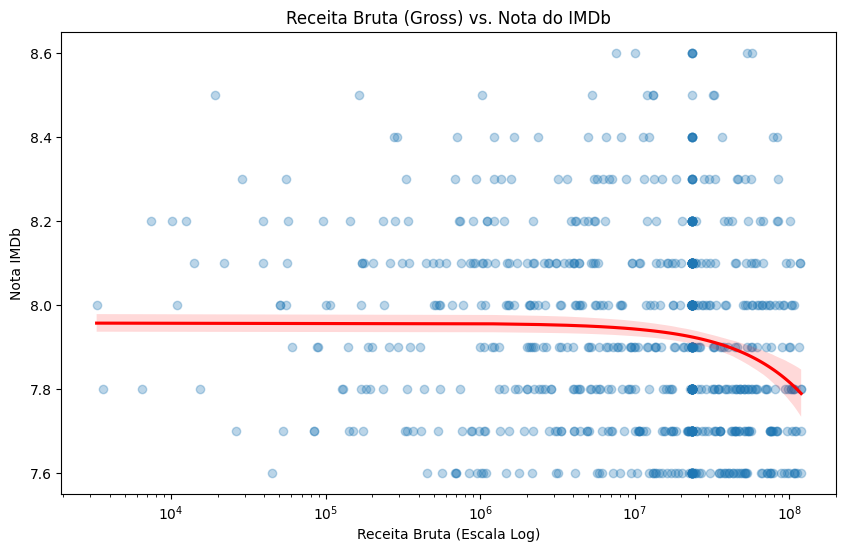

In [179]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_tratadissimo, x='Gross', y='IMDB_Rating',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xscale('log')
plt.title('Receita Bruta (Gross) vs. Nota do IMDb')
plt.xlabel('Receita Bruta (Escala Log)')
plt.ylabel('Nota IMDb')
plt.show()

#### Aqui nós vemos que para a grande maioria dos filmes, a bilheteria não está diretamente relacionada com a nota. O gráfico revela que essa tendência não só desaparece, como parece se inverter sutilmente no final.

## Fim da Análise Exploratória de Dados (EDA).
### Nesta parte conseguimos vizualiar melhor os dados e tratar aqueles que haviam necessidade. Agora, temos um caminho mais traçado, já visando testes do ML, que vai usar algumas dessas informações para prever a nota IMDb de um filme.

# 2 - Responda também as seguintes perguntas:
## 2.1 - Qual filme você recomendaria para uma pessoa que você não conhece?
### Do ponto de vista pessoal, recomendaria um filme que eu gosto muito e, apenas por esse motivo, indicaria O Homem que Mudou o Jogo para essa pessoa, pois é normal em relações sociais humanas, que as pessoas recomendam filmes que elas gostam para as outras, visando a possibilidade de terem algo que gostam juntos. Além de que, claro, para eu gostar do filme é porque eu acho que tem bons atores, um bom enredo, é um filme bem feito, entre outros fatores que fazem um filme ser bom.

### Sabendo que essa atividade pode pedir uma resposta mais técnica que essa, me coloco em uma realidade onde sou Cientista de Dados da Indicium e trabalho diariamente com dados de filmes. Após escutar essa pergunta, pedi para essa pessoa um dia, para que eu faça minhas pesquisas e tente achar o melhor filme que posso indicar para ela, visto que não a conheço, logo não sei qual seu ator favorito, qual seu gênero de filme preferido, etc. Logo, se faz necessário um filme que flutua bem entre essas variáveis. Um filme com uma nota alta, que tanto pessoas que gostam de drama, quantos pessoas que gostam de ação podem gostar do filme. Com atores famosos, para que a probabilidade da pessoa gostar do filme seja alta.  

In [180]:
lista_top_atores = contagem_atores.head(20).index.tolist()

# Filtro para pegarmos os melhores filmes
nota_corte = 8.5
votos_corte = df_tratadissimo['No_of_Votes'].quantile(0.75)
candidatos = df_tratadissimo.copy()
candidatos = candidatos[candidatos['IMDB_Rating'] >= nota_corte]

# Escolhendo filmes populares
candidatos = candidatos[candidatos['No_of_Votes'] >= votos_corte]

# Generos que as pessoas geralmente mais gostam
candidatos = candidatos[
    candidatos['Genre'].str.contains('Drama') |
    candidatos['Genre'].str.contains('Action') |
    candidatos['Genre'].str.contains('Adventure')
]

candidatos = candidatos[
    candidatos['Star1'].isin(lista_top_atores) |
    candidatos['Star2'].isin(lista_top_atores) |
    candidatos['Star3'].isin(lista_top_atores) |
    candidatos['Star4'].isin(lista_top_atores)
]

# Pegando o com mais votos
recomendacao_final = candidatos.sort_values(by='No_of_Votes', ascending=False)
filme_escolhido = recomendacao_final.iloc[0]
filme_escolhido

,33
Unnamed: 0,34
Series_Title,Whiplash
Released_Year,2014-01-01 00:00:00
Certificate,A
Runtime,0 days 01:46:00
Genre,"Drama, Music"
IMDB_Rating,8.50
Overview,A promising young drummer enrolls at a cut-thr...
Meta_score,88.00
Director,Damien Chazelle


### Sendo assim, retornaria a essa pessoa e indicaria o filme: Whiplash! Que inclusive, é um excelente filme.

## 2.2 - Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
### Para responder melhor essa pergunta decidi pesquisar sobre e estudar a área. Encontreiu um bom artigo da Universidade Municipal de São Caetano do Sul, que estudou os fatores que mais se correlacionaram com o sucesso de bilheteria de filmes no Brasil durante 2010 e 2019. Foram estudados 20 filmes nacionais e 20 filmes internacionais, usando uma técnica estatística de agrupamento (clusters). Fizeram muitos estudos bons, mas respondendo a pergunta, o artigo diz que os principais fatores relacionados com a alta expectativa de faturamento de um filme são:
### Orçamento elevado: Os filmes de maior sucesso possuem orçamento de produção elevados, resultando em um elenco consagrado, efeitos visuais sofisticados e grande campanhas de marketing.
### Familiaridade Cultural: Público demonstra ter um conhecimento prévio sobre a narrativa. Todas as produções no grupo de maior sucesso eram sequências de filmes bem-sucedidos ou adaptações de outras mídias, como quadrinhos. Particularmente, me identifico nesse fator quando o assunto é filme de heróis.
### Gênero Ação-Aventura: Predomínio desses gêneros em filmes com maiores receitas.
### Uso de efeitos visuais: Presente em todos os filmes de maior arrecadação.
### Ampla distribuição: Grande número de salas transmitindo o filme.

### Fator interessante. O artigo destacou que o fator Premiações (Oscar) se mostrou irrelevante para os filmes de maior sucesso no Brasil.

## 2.3 - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
### A coluna Overview traz uma sinopse bem direta do filme, poupando o leitor de detalhes mais profundos porém usando estratégias que tentam chamar a atenção do mesmo para ver o filme. Mesmo com poucos detalhes, pode-se tirar insights dessa coluna através de palavras chaves geralmente usadas nessa sinopse. Palavras como amor e relacionamento indicam um filme mais romântico, que irá tratar mais de emoções, relacionamentos pessoais, etc. Palavras como guerra, morte e acidente indicam um filme mais pesado, provavelmente com mais ação e drama. Além disso, um Ovierview que diz o lugar e a época que o filme se passa também nos permite a ter insights sobre o estilo do filme e até a cultura representada. Um filme que se passa no sertão brasileiro terá fortes representatividade com os costumes do local, um filme que se passa no "Reino das Fadas" vai ser um filme de mais fantasia. Dito isso, também é possível inferir o gênero do filme a partir dessa coluna, mas não com total garantia. Essas mesmas palavras e contextualizações podem ser estudadas para serem padronizadas por gênero, mas nem sempre será possível de acertar com perfeição.

## 3 - Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

## Vamos separar essa questão em partes, para termos um fluxo mais leve e contínuo

###  Qual tipo de problema estamos resolvendo (regressão, classificação)?
#### Regressão. O problema consiste em análisar as váriavies dos filmes como gross, director, etc (features) para prever um valor numérico, a nota IMDb (label). Seria de classificação caso o objetivo fosse preever a probabilidade do filme pertencer a alguma categoria.

###  Agora que já sabemos o objetivo do problema (prever a nota IMDb), vamos começar a responder a pergunta "Explique como você faria a previsão da nota do imdb a partir dos dados". Para explicar isso, vamos primeiro analisar "Quais variáveis e/ou suas transformações você utilizou e por quê?"



In [181]:
# Já transformamos aqueles dados que achei que deveria tratar
# Também através das perguntas da nosso EDA vimos que algumas variáveis não estão muito relacionadas a Nota IMDb
# Partindo desse ponto, o primeiro passo vai ser selecionar as colunas que considero importantes

training_df = df_tratadissimo.loc[:, ('Director', 'Meta_score', 'No_of_Votes', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4', 'IMDB_Rating')]
print(training_df.head())

              Director  Meta_score  No_of_Votes  \
17         Thomas Kail       90.00        55291   
18        Bong Joon Ho       96.00       552778   
19       Sudha Kongara       79.00        54995   
21  Fernando Meirelles       79.00       699256   
22      Hayao Miyazaki       96.00       651376   

                                             Overview               Star1  \
17  The real life of one of America's foremost fou...  Lin-Manuel Miranda   
18  Greed and class discrimination threaten the ne...        Kang-ho Song   
19  Nedumaaran Rajangam "Maara" sets out to make t...              Suriya   
21  In the slums of Rio, two kids' paths diverge a...          Kátia Lund   
22  During her family's move to the suburbs, a sul...       Daveigh Chase   

                  Star2            Star3                   Star4  IMDB_Rating  
17         Phillipa Soo  Leslie Odom Jr.  Renée Elise Goldsberry         8.60  
18         Lee Sun-kyun    Cho Yeo-jeong            Choi Woo-sik      

In [182]:
# Segundo passo: usar matriz de correlação para identificar características cujos valores se correlacionam bem com o rótulo. Os valores de correlação têm os seguintes significados:
# 1.0: correlação positiva perfeita; ou seja, quando um atributo aumenta, o outro atributo aumenta.
#-1.0: correlação negativa perfeita; ou seja, quando um atributo aumenta, o outro atributo diminui.
# 0.0: sem correlação; as duas colunas não são linearmente relacionadas.
# Em geral, quanto maior o valor absoluto de um valor de correlação, maior seu poder preditivo.

training_df.corr(numeric_only = True)

,Meta_score,No_of_Votes,IMDB_Rating
Meta_score,1.00,-0.07,0.25
No_of_Votes,-0.07,1.00,0.25
IMDB_Rating,0.25,0.25,1.00


In [183]:
# Criando Pair Plot para nos ajudar a identificar visualmente quais variáveis parecem ter uma relação linear entre si

px.scatter_matrix(training_df, dimensions=['IMDB_Rating', 'Meta_score', 'No_of_Votes'])

In [186]:
# Funções para construir e treinar o modelo

def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple linear regression model."""
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:

  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )


Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 567.9899 - rmse: 23.8163
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 379.2078 - rmse: 19.4645
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 251.1625 - rmse: 15.8384
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 152.0454 - rmse: 12.3192
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.6718 - rmse: 8.9119
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.6458 - rmse: 5.6961
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4541 - rmse: 2.8882   
Epoch 8/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3888 - rmse: 1.1752 
Epoch 9/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9521 - rmse: 0.9756 
Epoch 10/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9545 - rmse: 0.9769 
Epoch 11/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9517 - rmse: 0.9754 
Epoch 12/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9470 - rmse: 0.9730 
Epoch 13/60
24/

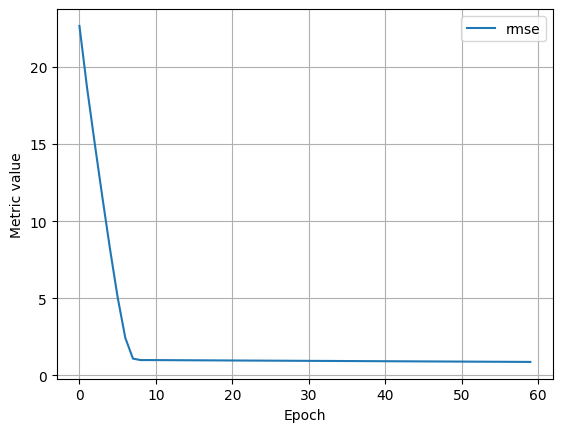

In [187]:
# Treinando um modelo com uma Feature
# Vimos que Meta Score se correlaciona fortemente com a nota IMDb, então vamos começar com ela
# Fiquei bastante tempo nessa parte. Estava baseando nas configurações do curso e não estavam muito boas para meu df
# Fui mudando as configurações_1 tentando entender um padrão de comportamento até achar o melhor resultado dos gráficos
# Ficou assim:

configuracoes_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.002,
    number_epochs = 60,
    batch_size =32,
    input_features = ['Meta_score']
)

metricas = [keras.metrics.RootMeanSquaredError(name='rmse')]
modelo_1 = create_model(configuracoes_1, metricas)

experimento_1 = train_model(
    experiment_name='modelo_com_uma_feature',
    model=modelo_1,
    dataset=training_df,
    label_name='IMDB_Rating',
    settings=configuracoes_1
)

ml_edu.results.plot_experiment_metrics(experimento_1, ['rmse'])
ml_edu.results.plot_model_predictions(experimento_1, training_df, 'IMDB_Rating')

####Após diversos testes ajustando hiperparâmetros como a taxa de aprendizado e o número de épocas, este gráfico representa o melhor resultado possível para o modelo usando apenas a variável Meta_score. Embora exista uma clara tendência positiva, o resultado ainda é muito linear e não captura toda a complexidade das notas. Para buscar uma maior precisão, o próximo passo será adicionar uma nova variável que considero ter grande influência: o Diretor do filme.

In [188]:
# Tratando director para testar no modelo com 2 variáveis
media_por_diretor = training_df.groupby('Director')['IMDB_Rating'].mean()
training_df['Director_Encoded'] = training_df['Director'].map(media_por_diretor)

Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3405.6392 - rmse: 58.3488
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2856.8853 - rmse: 53.4451
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2428.1367 - rmse: 49.2713
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2038.5797 - rmse: 45.1455
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1684.3577 - rmse: 41.0355
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1365.0521 - rmse: 36.9407
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1080.4852 - rmse: 32.8644
Epoch 8/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 830.4628 - rmse: 28.8107
Epoch 9/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 614.7395 - rmse: 24.7861
Epoch 10/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 432.9955 - rmse: 20.7997
Epoch 11/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 284.7935 - rmse: 16.8655
Epoch 12/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169.5054 - rmse: 13

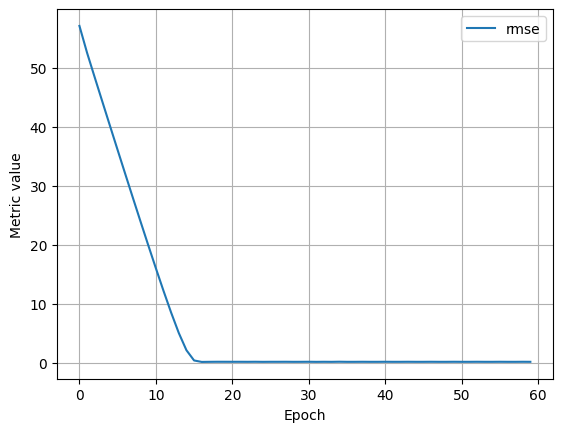

In [189]:
# Duas feature
configuracoes_duas_features = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.002,
    number_epochs = 60,
    batch_size = 32,
    input_features = ['Meta_score', 'Director_Encoded']
)

metricas = [keras.metrics.RootMeanSquaredError(name='rmse')]
label_name = 'IMDB_Rating'

modelo_tres_features = create_model(configuracoes_duas_features, metricas)

experimento_tres_features = train_model(
    experiment_name='modelo_com_tres_features',
    model=modelo_tres_features,
    dataset=training_df,
    label_name=label_name,
    settings=configuracoes_duas_features
)

ml_edu.results.plot_experiment_metrics(experimento_tres_features, ['rmse'])
ml_edu.results.plot_model_predictions(experimento_tres_features, training_df, label_name)

#### Este gráfico me chama a atenção! Ao adicionar a variável Director_Encoded, o resultado melhorou visivelmente. Mesmo que ainda existam alguns pontos mais distantes, conseguimos um resultado consideravelmente bom, onde a nuvem de pontos se alinha de forma clara com o plano de previsão do modelo

## Agora vamos usar nosso modelo para prever a Nota IMDb!

In [195]:
# Definindo funções para prever a nota

def format_rating(x):
  return "{:.1f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_rating(model, df, features, label, batch_size=20):
  batch = build_batch(df, batch_size)

  feature_values = {name: batch[name].values for name in features}
  predicted_values = model.predict_on_batch(x=feature_values)


  data = {
      "PREDICTED_RATING": [],
      "OBSERVED_RATING": [],
      "ERROR": []
  }
  for feature in features:
    data[feature] = []

  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]

    data["PREDICTED_RATING"].append(format_rating(predicted))
    data["OBSERVED_RATING"].append(format_rating(observed))
    data["ERROR"].append(format_rating(abs(observed - predicted)))

    for feature in features:
        data[feature].append(batch.at[i, feature])

  return pd.DataFrame(data)

def show_predictions(output_df):
  header = "-" * 100
  banner = header + "\n" + "|" + "COMPARANDO PREVISÕES E VALORES REAIS".center(98) + "|" + "\n" + header
  print(banner)
  print(output_df)
  return

In [197]:
output = predict_rating(
    experimento_tres_features.model,
    training_df,
    experimento_tres_features.settings.input_features,
    label_name
)

show_predictions(output)

----------------------------------------------------------------------------------------------------
|                               COMPARANDO PREVISÕES E VALORES REAIS                               |
----------------------------------------------------------------------------------------------------
   PREDICTED_RATING OBSERVED_RATING ERROR  Meta_score  Director_Encoded
0               8.0             8.3   0.3       84.00              8.15
1               8.0             8.2   0.2       79.00              8.20
2               7.8             8.0   0.2       88.00              8.00
3               8.0             8.3   0.3       79.00              8.18
4               7.7             7.8   0.1       86.00              7.80
5               7.9             8.1   0.2       96.00              8.10
6               7.7             7.8   0.1       79.00              7.80
7               7.8             7.8   0.0       73.00              7.95
8               8.1             8.3   0.2       7

#### E está aí nosso excelente resultado! Veja como os erros são baixos.

## Voltando as perguntas que começaram essa análise:
## Explique como você faria a previsão da nota do imdb a partir dos dados:
### Para prever a nota do IMDb, um problema de regressão, construí um modelo de Machine Learning de forma incremental usando Keras. Comecei testando um modelo base apenas com a variável Meta_score, que mostrou forte correlação na análise exploratória. Em seguida, para melhorar o resultado, adicionei a variável Director_Encoded. A análise dos gráficos de predição confirmou que o modelo com as duas features se ajustou de forma muito mais precisa aos dados, sendo este o escolhido para as previsões finais.

## Quais variáveis e/ou suas transformações você utilizou e por quê?
### As variáveis utilizadas no modelo final foram Meta_score e Director_Encoded. A Meta_score foi selecionada pela clara correlação linear com a nota do IMDb, observada no scatter_matrix. A variável Director foi incluída sob a hipótese de que a qualidade da direção impacta a avaliação do filme. Como o modelo não aceita texto, apliquei uma transformação de Target Encoding, calculando a nota média do IMDb para cada diretor e usando esse valor para criar a feature numérica Director_Encoded, que representa o histórico de performance de cada um.


## Outras duas perguntas
## Qual modelo melhor se aproxima dos dados e quais seus prós e contras?
### O modelo de Regressão Linear Múltipla desenvolvido se mostrou uma boa aproximação para os dados, tendo como principais prós sua simplicidade e alta interpretabilidade, que permite entender o peso de cada variável na previsão. Seu principal contra, no entanto, é a incapacidade de capturar relações não-lineares complexas.

## Qual medida de performance do modelo foi escolhida e por quê?
### A medida de performance escolhida foi a Raiz do Erro Quadrático Médio (RMSE). A escolha se deu por duas razões principais: primeiro, o resultado é expresso na mesma unidade da variável alvo (a própria nota IMDb), o que torna o erro do modelo facilmente interpretável. Segundo, e mais importante, o RMSE penaliza erros grandes de forma mais acentuada do que erros pequenos por elevar as diferenças ao quadrado, o que é desejável, pois uma previsão muito distante do valor real é significativamente pior do que uma que erra por pouco.

## 4 - Supondo um filme com as seguintes características, qual seria a nota do IMDB?
### Na célula abaixo passei esse filme para meu modelo e ele previu a nota de 7.76
### Pesquisando a nota do filme no IMDb o erro se aproximou de 2. Sendo sincero não é o melhor resultado, mas considero como bom.

In [206]:
media_por_diretor = training_df.groupby('Director')['IMDB_Rating'].mean()

filme_para_prever = {
    'Meta_score': 80.0,
    'Director': 'Frank Darabont'
}
df_para_prever = pd.DataFrame([filme_para_prever])

df_para_prever['Director_Encoded'] = df_para_prever['Director'].map(media_por_diretor)

if df_para_prever['Director_Encoded'].isnull().any():
    media_geral_imdb = training_df['IMDB_Rating'].mean()
    df_para_prever['Director_Encoded'] = df_para_prever['Director_Encoded'].fillna(media_geral_imdb)

features_para_prever = {
    name: df_para_prever[name].values
    for name in experimento_tres_features.settings.input_features
}

nota_prevista = experimento_tres_features.model.predict(features_para_prever)

print(f"A nota prevista para 'The Shawshank Redemption' é: {nota_prevista[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
A nota prevista para 'The Shawshank Redemption' é: 7.76


# FIM DO DESAFIO!
## Queria agradecer mais uma vez a equipe Indicium pela oportunidade. Confesso que fiquei bem orgulho do meu projeto. Claro que o modelo poderia ter sido melhor, com erros mais leves, porém tendo em vista que eu aprendi praticamente tudo, principalmente de aprendizado de máquina, em apenas 7 dias torna o resultado melhor. Fico contente pelo aprendizado, independente do resultado ele ficará para sempre, e caso eu faça o processo novamente, estarei mais bem preparado. Espero que tenham gostado!

### Preparação para envio:

In [207]:
import pickle

nome_arquivo_pkl = 'modelo_imdb.pkl'

with open(nome_arquivo_pkl, 'wb') as file:
    pickle.dump(experimento_tres_features.model, file)

In [209]:
%%writefile requirements.txt
google-ml-edu==0.1.3
keras~=3.8.0
matplotlib~=3.10.0
numpy~=2.0.0
pandas~=2.2.0
tensorflow~=2.18.0
scikit-learn
lightgbm
seaborn
plotly

Overwriting requirements.txt


In [210]:
from google.colab import files

files.download('modelo_imdb.pkl')
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>